In [1]:
import pandas as pd
import time
import sklearn

pd.__version, sklearn.__version__

'1.2.1'

In [2]:
SCRATCH_DIR = "/scratch/siads696f23_class_root/siads696f23_class/psollars"

In [4]:
start_time = time.time()
df = pd.read_parquet(f"{SCRATCH_DIR}/predictive_features_2019.parquet")
end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

df

Elapsed time: 6.1440 seconds


,Month,DayOfWeek,Reporting_Airline,Tail_Number,CRSDepTime,CRSArrTime,DistanceGroup,YEAR MFR,engine_manufacturer,engine_model,aircraft_manufacturer,aircraft_model,Origin_LATITUDE,Origin_LONGITUDE,Dest_LATITUDE,Dest_LONGITUDE,delayed
24733033,1,5,OO,945SW,1400,1510,1,2003,GE,CF34 SERIES,BOMBARDIER INC,CL-600-2B19,35.237222,-120.642500,37.618889,-122.375556,False
24733034,1,5,OO,932SW,0935,1118,2,2002,GE,CF34 SERIES,BOMBARDIER INC,CL-600-2B19,29.984444,-95.341389,36.281667,-94.307778,False
24733035,1,5,OO,932SW,0643,0855,3,2002,GE,CF34 SERIES,BOMBARDIER INC,CL-600-2B19,37.245556,-93.388611,29.984444,-95.341389,False
24733036,1,5,OO,916SW,1335,1433,3,2002,GE,CF34 SERIES,BOMBARDIER INC,CL-600-2B19,48.178056,-103.642222,39.861667,-104.673056,False
24733037,1,5,OO,107SY,0836,1040,4,2014,GE,CF34-8E5,EMBRAER S A,ERJ 170-200 LR,42.946944,-87.896944,39.861667,-104.673056,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32288695,12,7,DL,346DN,0600,0802,4,2018,CFM INTL,CFM56-5B3/3,AIRBUS,A321-211,33.636667,-84.427778,40.777222,-73.872500,False
32288696,12,7,DL,697DL,1209,1438,6,1999,P & W,PW2037,BOEING,757-232,28.429444,-81.308889,44.881944,-93.221667,True
32288697,12,7,DL,697DL,0650,1110,6,1999,P & W,PW2037,BOEING,757-232,44.881944,-93.221667,28.429444,-81.308889,True
32288698,12,7,DL,6714Q,1639,1932,8,2000,P & W,PW2037,BOEING,757-232,38.851389,-77.037778,40.788333,-111.977778,False


In [5]:
# WN    Southwest Airlines Co.
# DL    Delta Air Lines, Inc.
# AA    American Airlines Inc.
# OO    SkyWest Airlines
# UA    United Airlines, Inc.
# YX    Republic Airways Inc
# MQ    Envoy Air Inc.
# B6    Jetblue Airways Corporation
# OH    PSA Airlines, Inc.
# AS    Alaska Airlines Inc.
# 9E    Endeavor Air
# YV    Mesa Airlines, Inc.
# NK    Spirit Airlines
# F9    Frontier Airlines, Inc.
# EV    Tatonduk Outfitters Limited dba Eve Air Alaska dba Everts Air Cargo
# G4    Allegiant Air LLC
# HA    Hawaiian Airlines, Inc.

df.value_counts("Reporting_Airline")

Reporting_Airline
WN    1371368
DL    1002187
AA     943965
OO     818236
UA     632687
YX     321198
MQ     313897
B6     296335
OH     280941
AS     264625
9E     252508
YV     222482
NK     205997
F9     138366
EV     127838
G4     105571
HA      83465
Name: count, dtype: int64

In [7]:
united_df = df[df["Reporting_Airline"].eq("UA")].drop("Reporting_Airline", axis=1)

united_df.head()

,Month,DayOfWeek,Tail_Number,CRSDepTime,CRSArrTime,DistanceGroup,YEAR MFR,engine_manufacturer,engine_model,aircraft_manufacturer,aircraft_model,Origin_LATITUDE,Origin_LONGITUDE,Dest_LATITUDE,Dest_LONGITUDE,delayed
25272175,1,2,19141,1140,1700,6,2000,ROLLS-ROYC,RB-211 SERIES,BOEING,757-224,33.942500,-118.408056,29.984444,-95.341389,False
25272176,1,2,68802,1204,1520,4,2013,CFM INTL,CFM56-7B27E,BOEING,737-924ER,29.984444,-95.341389,28.429444,-81.308889,False
25272177,1,2,34455,1606,1849,4,2012,CFM INTL,CFM56-7B26E,BOEING,737-924ER,28.429444,-81.308889,40.692500,-74.168611,True
25272178,1,2,480UA,2230,2329,1,2001,IAE,V2500SERIES,AIRBUS INDUSTRIE,A320-232,38.947500,-77.460000,40.491389,-80.232778,False
25272179,1,2,19117,1300,1634,11,1996,ROLLS-ROYC,RB-211 SERIES,BOEING,757-224,40.692500,-74.168611,37.618889,-122.375556,False


In [8]:
num_cols = [
    "CRSDepTime",
    "CRSArrTime",
    "Origin_LATITUDE",
    "Origin_LONGITUDE",
    "Dest_LATITUDE",
    "Dest_LONGITUDE",
]

cat_cols = [
    "Month",
    "DayOfWeek",
    # "Reporting_Airline",
    "Tail_Number",
    "DistanceGroup",
    "YEAR MFR",
    "engine_manufacturer",
    "engine_model",
    "aircraft_manufacturer",
    "aircraft_model",
]

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

start_time = time.time()

# Separate features and labels
X = df.drop("delayed", axis=1)
y = df["delayed"]

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(), cat_cols),
    ]
)

# Fit and transform the entire dataset
X_transformed = preprocessor.fit_transform(X)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse i

Elapsed time: 59.4220 seconds


In [10]:
from sklearn.model_selection import train_test_split

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 8.4454 seconds


In [11]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()

logistic_regression = LogisticRegression(solver='saga', max_iter=1000)
logistic_regression.fit(X_train, y_train)

end_time = time.time()

print(f"Elapsed time: {(end_time - start_time):.4f} seconds")

Elapsed time: 5307.1303 seconds


In [12]:
import pickle


with open(f"{SCRATCH_DIR}/07_logistic_regression_predictive_features_2019_UA.pkl", "wb") as f:
    pickle.dump(logistic_regression, f)
    

In [13]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    precision_recall_curve,
)
import matplotlib.pyplot as plt

y_pred = logistic_regression.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

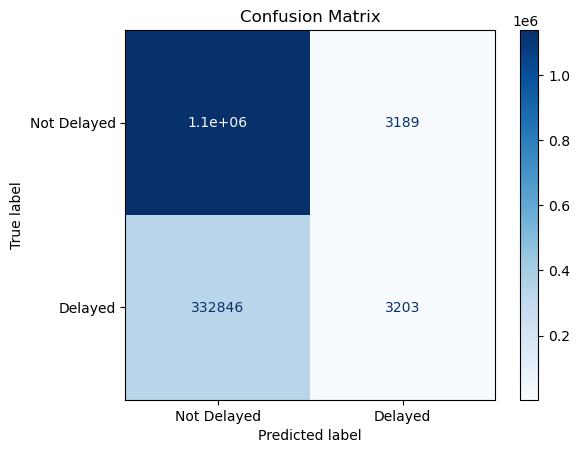

In [14]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Not Delayed", "Delayed"]
).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

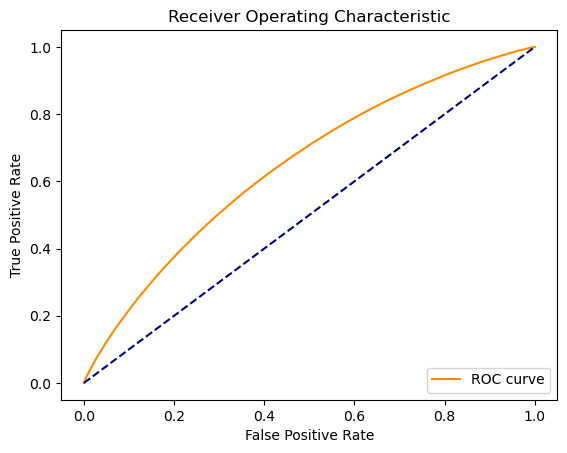

In [15]:
fpr, tpr, _ = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, color="darkorange", label="ROC curve")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

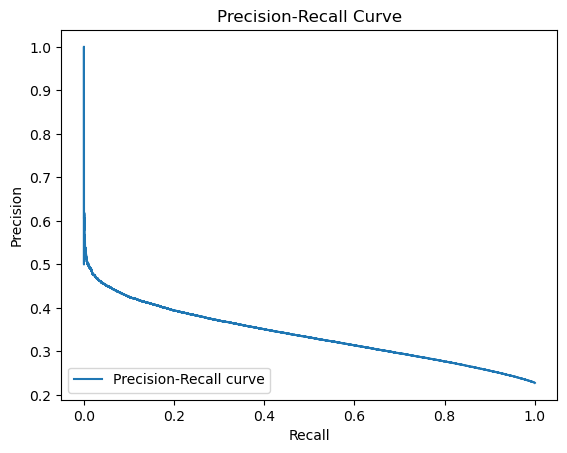

In [16]:
precision, recall, _ = precision_recall_curve(
    y_test, logistic_regression.predict_proba(X_test)[:, 1]
)

plt.figure()
plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

In [ ]:
import altair as alt


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


metrics_scores = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
}

df_metrics = pd.DataFrame(list(metrics_scores.items()), columns=["Metric", "Score"])

alt.Chart(df_metrics).mark_bar().encode(
    y="Metric:N", x="Score:Q", color="Metric:N", text=alt.Text("Score:Q", format=".2f")
).properties(title="Evaluation Metrics", width=600, height=300).configure_axis(
    labelFontSize=12, titleFontSize=14
)